# Linear Regression on Housing Prices

The goal is to predict housing prices based on the square footage (denoted as $x{_1}$) and the number of bedrooms $x_2$

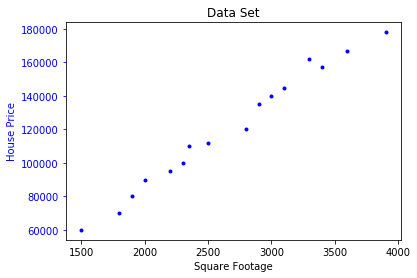

In [10]:
# Linear regression
# Estimating house prices based on square footage and number of bedrooms.

import numpy as np
# See: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot
import matplotlib.pyplot as plt
from numpy.linalg import inv

LOGML = 0 # some info
DEBUG = 0 # more info

# This is the training data, 16 examples
# sqft, bedrooms, price
train_data = np.array([
    [1500, 2, 60000],
    [1800, 2, 70000],
    [1900, 2, 80000],
    [2000, 3, 90000],
    [2200, 3, 95000],
    [2300, 2, 100000],
    [2350, 3, 110000],
    [2500, 3, 112000],
    [2800, 4, 120000],
    [2900, 3, 135000],
    [3000, 4, 140000],
    [3100, 4, 145000],
    [3300, 5, 162000],
    [3400, 4, 157000],
    [3600, 5, 167000],
    [3900, 5, 178000]
])

# Test data
test_data = np.array([
    [1785, 2],
    [1950, 2],
    [2065, 3],
    [2345, 2],
    [2385, 3],
    [2415, 3],
    [2485, 4],
    [2665, 3],
    [2875, 4],
    [3050, 4],
    [3250, 5],
    [3350, 4],
    [3425, 3],
    [3715, 5]
])

# Extract the feature vectors
trained_featrs = train_data[:, :-1]
num_examples, num_features = trained_featrs.shape # rows and cols

# Adjust n to account for the additional intercept term (x0 = 1)
num_features = num_features + 1

# Extract the expected outcomes
trained_labels = train_data[:, -1]

#Plot the data set
x_sq_footage = trained_featrs[:, 0] # extract square footage column vector

ax1 = plt.subplot()
ax1.plot(x_sq_footage, trained_labels, 'b.') # b. is blue dots
# Set the left y-axis label, ticks and tick labels match the line color.
ax1.set_xlabel('Square Footage')
ax1.set_ylabel('House Price', color='b')
ax1.tick_params('y', colors='b')
plt.title("Data Set")
plt.show()

# ------------------------------------------------------
# Define plot results function
# ------------------------------------------------------
def plot_results(trained_feat, trained_lbls, v_theta, tst_never_seen_data, title):
    # Plot training data
    x_sq_footage = trained_feat[:, 0] # extract square footage column vector

    ax1 = plt.subplot()
    ax1.plot(x_sq_footage, trained_lbls, 'b.') # b. is blue dots
    # Set the left y-axis label, ticks and tick labels match the line color.
    ax1.set_xlabel('Square Footage')
    ax1.set_ylabel('House Price', color='b')
    ax1.tick_params('y', colors='b')

    # Draw a line between our end-points "ep"
    # to show the linear fitting expected
    y_ep = np.linspace(0.0, 0.0, 2)
    x_ep = np.linspace(0.0, 0.0, 2)
    y_ep[0] = trained_lbls[0]
    x_ep[0] = trained_feat[0][0]
    y_ep[1] = trained_lbls[num_examples - 1]
    x_ep[1] = trained_feat[num_examples - 1][0]

    ax1.plot(x_ep, y_ep, 'r-')
    #ax1.set_ylabel('hypothesis', color='r')

    # Plot the hypothesis estimates from the test_data
    j, k = tst_never_seen_data.shape
    hyp_y = np.zeros(j)
    hyp_x = np.zeros(j)

    for index in range(j):
        x = np.append([1], tst_never_seen_data[index])
        hyp_y[index] = hypothesis(v_theta, x) # make the prediction
        hyp_x[index] = x[1]

    ax1.plot(hyp_x, hyp_y, 'r^') # red triangles
    plt.title(title)
    plt.show()
# end plot_results()

The number of features are 2, $x{_1}$ = Sq footage and $x{_2}$ = Number of beedrooms. The output $y$ is what we want to predict (**target value**).

We can represent the hypothesis function as a linear combination of the features ($x$) and corresponding weights ($θ$).
The hypothesis function can be expressed as:
$${h_\Theta(x) = \Theta_0x_0 + \Theta_1x_1 + \Theta_2x_2}$$

Here, we set $x_0=1$ and $Θ_0$​ becomes the intercept term, 
> similar to the intercept term ($b$) in the equation of a line ($y = ax + b$).

We can rewrite the hypothesis function using vector notation as:
$$ \Theta = \begin{bmatrix}
\Theta_0 \\
\Theta_1 \\
\Theta_2 \\
... \\
\Theta_n \\
\end{bmatrix}
x = \begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
... \\
x_n \\
\end{bmatrix} $$

$$h_\Theta(x) = \sum_{i=0}^{n}\Theta_ix_i=\Theta^Tx$$

That give us a real number! as $\Theta^Tx=\mathbb{R}=h_\Theta(x))$

To *learn* the values of the weights ($Θ$), we define a cost function $J(Θ)$ that measures the error between the predicted values and the actual target values ($h( ) ~= y$). In the case of linear regression, a common cost function is the mean squared error (*MSE*), which can be defined as:

$$J(\Theta)= \frac{1}{2}\sum_{i=1}^{m}(h_\Theta(x[i])-y[i])^2$$
> where $[i]$ refers to training examples

The objective is to minimize the value of the cost function by choosing appropriate values for the weights ($Θ$). This is typically achieved using optimization algorithms like gradient descent.

## Gradient Descent
Gradient descent is an iterative optimization algorithm used to update the weights in order to minimize the cost function. The update rule for each weight ($Θ_j$​) can be expressed as: 
$$\Theta_j = \Theta_j-\alpha \frac{\partial }{\partial \Theta_j}J(\Theta), j=0...n$$

Here, $α$ (hyper parameter) is the learning rate, which controls the step size of the updates. The partial derivative term represents the gradient of the cost function with respect to $Θ_j$​.

To update all the weights simultaneously, we iterate through all the training examples ($m$) using the following update rule:
$$\Theta_j = \Theta_j + \alpha \sum_{i=1}^{m}(y[i]-h_\Theta(x[i]))x[i]_j,j=0...n$$

This process is repeated until convergence, which is determined by a user-defined stopping criterion. It's important to note that the cost function $J(Θ)$ in this case is a convex quadratic function, meaning it has only one global minimum. However, caution should be exercised with functions that may have local minima, as gradient descent can get "*stuck*" in such cases.

 > One drawback of this approach is that every update of the weights requires iterating through all the training samples ($m$), making it computationally expensive for large training sets.


********************************
batch_gradient_descent_training()
********************************
Info: Theta delta above threshold, not converged, run another iteration
Info: Theta delta above threshold, not converged, run another iteration
Info: Theta delta above threshold, not converged, run another iteration
Theta's converged
Batch trained theta= [  1.53909394e-02   4.54558430e+01   5.86869550e-02]


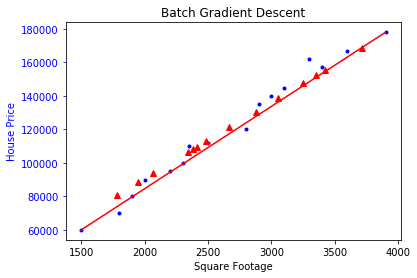

In [11]:
# ------------------------------------------------------------
# Define global variables and hyperparameters
# The relationship between these two is critical:
# ALPHA (the learning rate) cannot be too high or the theta's oscillate from large 
#    positive numbers to large negative numbers, and can exceed THETA_OUT_OF_BOUNDS_VALUE.
#    Learning rate too small takes too long and may exceed MAX_ITERATIONS. 
# THETA_DELTA_THRESHOLD needs to be adjusted to a level that allo ws
#    the algorithms to approach the global minimum of the theta v alue.
#    Too small and it may take too long and may exceed MAX_ITERATIONS.
#    Too large and it may stop iterating too soon, you end up farther away
#    from the global minimum.
# ------------------------------------------------------------

THETA_OUT_OF_BOUNDS_VAL = 5.0e+20 # used for bounds checking run-away conditions
MAX_ITERATIONS          = 20
THETA_DELTA_THRESHOLD   = 2
ALPHA                   = 0.00000001 # learning rate

# ------------------------------------------------------------
# Define batch gradient descent function
# ------------------------------------------------------------
def batch_gradient_descent_training(trained_feats, trained_lbls, alpha, THETA_OUT_OF_BOUNDS, THETA_DELTA_TRSHLD, MAX_ITER):

    print ("********************************")
    print ("batch_gradient_descent_training()")
    print ("********************************")

    n_smpls, n_feats  = trained_feats.shape
    n_feats += 1 # add 1 for the x0=1 feature

    # Initialize theta with zeros, taking into account the adjusted dimensionality
    theta = np.zeros(n_feats)
    new_theta = np.zeros(n_feats)

    training_iterations = 0

    try:
        while True: # repeat until convergence

            training_iterations += 1
            if training_iterations > MAX_ITER:
                print("Info: Training iterations exceeded=", MAX_ITER)
                break

            if LOGML:
                print("-------------------------------------------------------")
                print("Theta vector=", theta)

            for j in range(n_feats): # Step through each theta

                error_sum = 0
                # All training examples are used to adjust each theta value
                for i in range(n_smpls): # Step through each training example
                    x = np.append([1], trained_feats[i]) # extract 1 training example vector, Prepend x0=1
                    error_term = calculate_cost(trained_lbls[i], theta, x, x[j])
                    error_sum = error_sum + error_term
                    if (DEBUG) :
                        print ("theta=", theta)
                        print ("    x=", x)
                        print ("    h(t,x)=", hypothesis(theta, x))
                        print ("    trained_labels[i]=", trained_labels[i])
                        print ("    x[j]=", x[j])
                        print ("   error term=", error_term)
                        print ("    error sum=", error_sum)
                        print ("")

                new_theta[j] = update_theta(theta[j], error_sum, alpha) # calculate new theta's

                if (DEBUG) :
                    print ("new_theta[", j, "]=", new_theta[j])
                    print ("Inc. new theta vector=", new_theta)
                    print ("-----------------------------------------------------")

            # end - for j in range()

            #we have updated theta values in new_theta [ ] 
            # Check for convergence
            keep_going = 0
            theta_out_of_range = False
            for k in range(n_feats):
                if abs(new_theta[k] - theta[k]) > THETA_DELTA_TRSHLD:
                    keep_going += 1 # we found 1 theta delta > than our threshold, so keep going
                    if abs(new_theta[k]) > THETA_OUT_OF_BOUNDS:
                        print("Error: Theta out-of-range=", new_theta[k])
                        theta_out_of_range =  True

            theta[:] = new_theta[:] # update the theta values

            if keep_going == 0 or theta_out_of_range == True:
                if keep_going == 0 and not theta_out_of_range:
                    print("Theta's converged")
                break # while
            else :
                print ("Info: Theta delta above threshold, not converged, run another iteration")
                
        # end - while True
    except Exception as e:
        print("Error in batch_gradient_descent_training:", str(e))

    return theta


# ------------------------------------------------------------
# Define our hypothesis function
# Our hypothesis is:
#   hypothesis(x) = theta_0*x0 + theta_1*x1 + theta_2*x2, where x0=1
#   hypothesis(x) = sum i=0 to n, theta_i*x_i = theta transpose * x
#
#   summation of theta transpose * x ie. dot product
#   theta is a vector
#   x is a vector, a training sample
# ------------------------------------------------------------

def hypothesis(theta, x):
    return np.dot(theta.T, x)

# ------------------------------------------------------------
# Define our cost function and error function
#  Cost function we choose is least-mean squares
#     J(theta) = 1/2 sum i=0 to m (hypothesis(x_i) - y_i)^2
#  minimizing J(theta) we get the update rule:
#     theta_j = theta_j - ALPHA d J(theta)/d theta_j
#  for all taining examples we get:
#     theta_j = theta_j + (ALPHA * sum((y_i - hypothesis(theta, x)) * x_ji)) for i=0..m
#     theta_j = theta_j + (ALPHA * sum(calculate_cost(y_i, theta, x, x_ji)) for i=0..m
#     theta_j = update_theta(theta_j,(calculate_cost(y_i, theta, x, x_ji))) for i=0..m
# ------------------------------------------------------------

def update_theta(theta_j, error_sum, alpha=ALPHA):
    return theta_j + (alpha * error_sum)

def calculate_cost(y_i, theta, x, x_ji):
    return (y_i - hypothesis(theta, x)) * x_ji

# ------------------------------------------------------
# Train batch gradient descent
# ------------------------------------------------------

trained_theta = batch_gradient_descent_training(trained_featrs, trained_labels, ALPHA, THETA_OUT_OF_BOUNDS_VAL, THETA_DELTA_THRESHOLD, MAX_ITERATIONS)

print("Batch trained theta=", trained_theta)

# ------------------------------------------------------
# Plot results
# ------------------------------------------------------

plot_results(trained_featrs, trained_labels, trained_theta, test_data, "Batch Gradient Descent")

## Stochastic gradient descent

This is an alternative as _batch gradient descent_, for each training example $m$ the $\Theta_i$'s is update. This approach is faster for large training sets but also it's less accurate
$$\Theta_j = \Theta_j + \alpha (y[i] - h_\Theta(x[i]))x[i]_j,j=0...n$$


***********************************
stochastic_gradient_descent_training()
***********************************
>>> iteration count= 1
Info: Theta delta above threshold, not converged, run another iteration
>>> iteration count= 2
Info: Theta delta above threshold, not converged, run another iteration
>>> iteration count= 3
Info: Theta delta above threshold, not converged, run another iteration
>>> iteration count= 4
Info: Theta delta above threshold, not converged, run another iteration
>>> iteration count= 5
Info: Theta delta above threshold, not converged, run another iteration
>>> iteration count= 6
Info: Theta delta above threshold, not converged, run another iteration
>>> iteration count= 7
Info: Theta delta above threshold, not converged, run another iteration
>>> iteration count= 8
Info: Theta delta above threshold, not converged, run another iteration
>>> iteration count= 9
Theta's converged
Stochastic trained theta= [  9.05192405e-03   3.53025038e+01   4.52596203e-02]


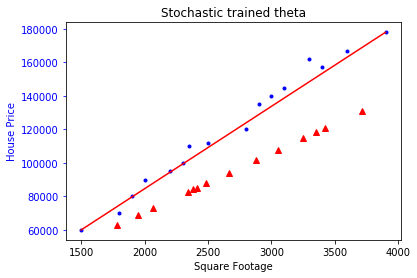

In [12]:
# --------------------------------------------------
# Define our stochastic gradient descent function
# --------------------------------------------------
def stochastic_gradient_descent_training(trained_feats, trained_lbls, THETA_OUT_OF_BOUNDS, THETA_DELTA_TRSHLD, MAX_ITER):

    print ("***********************************")
    print ("stochastic_gradient_descent_training()")
    print ("***********************************")
    
    n_smpls, n_feats  = trained_feats.shape
    n_feats += 1 # add 1 for the x0=1 feature

    # Initialize theta with zeros, taking into account the adjusted dimensionality
    theta = np.zeros(n_feats)
    new_theta = np.zeros(n_feats)

    training_iterations  = 0

    try:
        while True : # repeat until convergence


            training_iterations += 1
            if (training_iterations > MAX_ITER) :
                print ("-----------------------------------------------")
                print ("Info: Training iterations exceeded=", MAX_ITER)
                print ("-----------------------------------------------")
                break # while (1)
            else :
                print (">>> iteration count=", training_iterations)


            if (LOGML) :
                print ("-------------------------------------------------------")
                print ("Theta vector=", theta)

            for i in range(n_smpls) : # Step through each training example
            
                # Step through each theta
                for j in range(n_feats) : # Step through each theta
                    
                    x = np.append([1], trained_feats[i]) # extract 1 training example vector, Prepend x0=1
                    error_term = calculate_cost (trained_lbls[i], theta, x, x[j])
                    new_theta[j] = update_theta (theta[j], error_term) # calculate new theta's
                    #error_sum = error_sum + error_term
                    if (DEBUG) :
                        print ("theta=", theta)
                        print ("    x=", x)
                        print ("    h(t,x)=", h(theta, x))
                        print ("    trained_lbls[i]=", trained_lbls[i])
                        print ("    x[j]=", x[j])
                        print ("    error term=", error_term)
                        print ("")

                
                # end - for j in range
                
                if (DEBUG) :
                    print ("Inc. new theta vector=", new_theta)
                    print ("-----------------------------------------------------")
            
            # end - for i in range()
            
            # when we get here we have updated theta values in new_theta [ ] 
            # check for convergence
            keep_going = 0
            theta_out_of_range = False
            for k in range(n_feats) :
                if (abs(new_theta[k] - theta[k]) > THETA_DELTA_TRSHLD) :
                    keep_going += 1 # we found 1 theta delta > than our threshold, so keep going
                    if (abs(new_theta[k]) > THETA_OUT_OF_BOUNDS) :  
                        print ("Error: Theta out-of-range=", new_theta[k])
                        theta_out_of_range = True
                        
            theta[:] = new_theta[:] # update the theta values
        
            if ((keep_going == 0) or (theta_out_of_range == True)) :
                # stop training
                if ((keep_going == 0) and not (theta_out_of_range)) :
                    print ("Theta's converged")
                break # while (1)
            else :
                print ("Info: Theta delta above threshold, not converged, run another iteration")
                
        # end - while
    except Exception as e:
        print("Error in stochastic_gradient_descent:", str(e))

    return theta
    
# end - stochastic_gradient_descent ()

# ------------------------------------------------------
# Train Stochastic trained theta
# ------------------------------------------------------
s_trained_theta = stochastic_gradient_descent_training(trained_featrs, trained_labels, THETA_OUT_OF_BOUNDS_VAL, THETA_DELTA_THRESHOLD, MAX_ITERATIONS)

print("Stochastic trained theta=", s_trained_theta)

# ------------------------------------------------------
# Plot results
# ------------------------------------------------------
plot_results(trained_featrs, trained_labels, s_trained_theta, test_data, "Stochastic trained theta")

## Closed form equation

The third method is to calculate directly the $Θ_j$'s. In this methofd $J(Θ)$ is minimized explicitly by taking the derivatives of $Θ_j$'s and setting them to $0$.
After perform some linear algebra you obtain:
$$ Θ = (X^T X)^{-1} X^{T\overrightarrow{}}y$$

Closed form theta= [  1.00000000e+00   3.95580633e+01   4.67540178e+03]


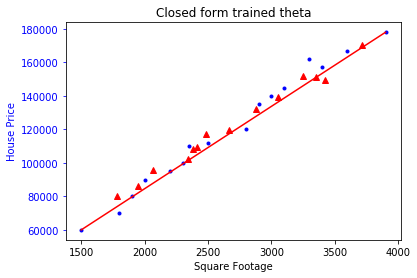

In [13]:
# ------------------------------------------------------
# Non-iterative, closed form equation
# ------------------------------------------------------
def closed_form_equation(num_featrs, train_featrs, trained_lbls):
    # init theta's
    cf_trained_theta = np.ones(num_featrs)

    try:
        # theta = (X^T * X)inverse * X^T * trained_lbls
        cf_trained_theta = np.dot(np.dot(inv(np.dot(train_featrs.T, train_featrs)), train_featrs.T), trained_lbls)
        cf_trained_theta = np.append([1], cf_trained_theta)

    except Exception as e:
        print("Error in closed_form_equation:", str(e))

    return cf_trained_theta
# end - closed_form_equation ()

# ------------------------------------------------------
# Train Closed form trained theta
# ------------------------------------------------------
cf_trained_theta = closed_form_equation(num_features, trained_featrs, trained_labels)

print ("Closed form theta=", cf_trained_theta)

# ------------------------------------------------------
# Plot results
# ------------------------------------------------------
plot_results(trained_featrs, trained_labels, cf_trained_theta, test_data, "Closed form trained theta")